# Peer review assignment 3

***

## Project Description

This week, the client has more questions for you to answer to further develop the profile of potential clients. This includes finding which cities to target and how to evaluate them. You will have access to crime rates, population, housing growth city wide data and segmentation distribution dumps to help in your analysis.

From the graphs, we can deduce Diverse Workers, Mass Markets, Young Affluent Mobiles , Young Urban Masses and Young Upscale Families occupies top 5. Even though Well-heeled Affluents wants to buy security devices the most, they will have more choices to choose from.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| City | City Names	|
| Segment | Segment Names |
| Total| Summation	|

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("cities.csv")

In [3]:
df

,City,ComfortableRetirees,DiverseWorkers,ElderMidscaleClass,EliteHouseholds,MassMarkets,ModestFamilies,ProsperousAcheivers,UpscaleMatures,WellheeledAffluents,YoungAffluentMobiles,YoungUpscaleFamilies,YoungUrbanMasses,Total
0,May,203,118,91,1,30,0,7,17,4,3,17,7,498
1,Aaronsburg,4,4,67,0,90,0,2,2,0,2,5,1,177
2,Abbeville,1426,2019,1782,53,1684,531,321,228,24,76,1156,779,10079
3,Abbot,104,47,31,0,17,0,0,2,0,0,2,1,204
4,Abbotsford,28,205,27,5,200,12,14,9,7,7,50,57,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15743,Zumbro Falls,12,6,31,17,172,0,42,25,6,15,30,9,365
15744,Zumbrota,25,55,88,62,239,12,25,69,34,100,260,57,1026
15745,Zuni,124,899,139,13,145,3,8,24,3,18,137,24,1537
15746,Zwingle,11,14,32,3,50,0,9,12,3,6,14,9,163


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15748 entries, 0 to 15747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   City                  15748 non-null  object
 1   ComfortableRetirees   15748 non-null  int64 
 2   DiverseWorkers        15748 non-null  int64 
 3   ElderMidscaleClass    15748 non-null  int64 
 4   EliteHouseholds       15748 non-null  int64 
 5   MassMarkets           15748 non-null  int64 
 6   ModestFamilies        15748 non-null  int64 
 7   ProsperousAcheivers   15748 non-null  int64 
 8   UpscaleMatures        15748 non-null  int64 
 9   WellheeledAffluents   15748 non-null  int64 
 10  YoungAffluentMobiles  15748 non-null  int64 
 11  YoungUpscaleFamilies  15748 non-null  int64 
 12  YoungUrbanMasses      15748 non-null  int64 
 13  Total                 15748 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.7+ MB


In [5]:
df.describe()

,ComfortableRetirees,DiverseWorkers,ElderMidscaleClass,EliteHouseholds,MassMarkets,ModestFamilies,ProsperousAcheivers,UpscaleMatures,WellheeledAffluents,YoungAffluentMobiles,YoungUpscaleFamilies,YoungUrbanMasses,Total
count,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00,15748.00
mean,222.43,575.78,325.54,240.18,568.00,249.11,231.99,189.91,168.14,346.41,404.52,426.03,3948.03
std,850.03,2839.37,998.51,1109.76,2442.70,1957.72,872.59,679.43,804.98,1871.16,1485.68,3249.07,16286.08
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,7.00,23.00,1.00,18.00,0.00,3.00,5.00,1.00,2.00,8.00,5.00,219.00
50%,42.00,55.00,83.00,7.00,89.00,2.00,18.00,26.00,5.00,13.00,42.00,21.00,669.00
75%,156.00,297.25,260.00,66.00,358.00,23.00,135.00,122.00,39.00,124.00,248.00,124.00,2498.00
max,43857.00,128468.00,39708.00,53139.00,88380.00,121997.00,34047.00,15175.00,43470.00,84491.00,48012.00,173307.00,567640.00


In [6]:
df.columns

Index(['City', 'ComfortableRetirees', 'DiverseWorkers', 'ElderMidscaleClass', 'EliteHouseholds', 'MassMarkets', 'ModestFamilies', 'ProsperousAcheivers', 'UpscaleMatures', 'WellheeledAffluents', 'YoungAffluentMobiles', 'YoungUpscaleFamilies', 'YoungUrbanMasses', 'Total'], dtype='object')

In [7]:
df["TargetGroups"] = df["DiverseWorkers"] + df["MassMarkets"] + df["YoungAffluentMobiles"] \
+ df["YoungUpscaleFamilies"] + df["YoungUrbanMasses"]

In [8]:
df.head()

,City,ComfortableRetirees,DiverseWorkers,ElderMidscaleClass,EliteHouseholds,MassMarkets,ModestFamilies,ProsperousAcheivers,UpscaleMatures,WellheeledAffluents,YoungAffluentMobiles,YoungUpscaleFamilies,YoungUrbanMasses,Total,TargetGroups
0,May,203,118,91,1,30,0,7,17,4,3,17,7,498,175
1,Aaronsburg,4,4,67,0,90,0,2,2,0,2,5,1,177,102
2,Abbeville,1426,2019,1782,53,1684,531,321,228,24,76,1156,779,10079,5714
3,Abbot,104,47,31,0,17,0,0,2,0,0,2,1,204,67
4,Abbotsford,28,205,27,5,200,12,14,9,7,7,50,57,621,519


In [9]:
df["Percentage"] = (df["TargetGroups"]/df["Total"]) * 100

In [10]:
df.head()

,City,ComfortableRetirees,DiverseWorkers,ElderMidscaleClass,EliteHouseholds,MassMarkets,ModestFamilies,ProsperousAcheivers,UpscaleMatures,WellheeledAffluents,YoungAffluentMobiles,YoungUpscaleFamilies,YoungUrbanMasses,Total,TargetGroups,Percentage
0,May,203,118,91,1,30,0,7,17,4,3,17,7,498,175,35.14
1,Aaronsburg,4,4,67,0,90,0,2,2,0,2,5,1,177,102,57.63
2,Abbeville,1426,2019,1782,53,1684,531,321,228,24,76,1156,779,10079,5714,56.69
3,Abbot,104,47,31,0,17,0,0,2,0,0,2,1,204,67,32.84
4,Abbotsford,28,205,27,5,200,12,14,9,7,7,50,57,621,519,83.57


In [11]:
df[["City","Total","Percentage"]].sort_values(by="Total", ascending=False, axis=0).head(8)

,City,Total,Percentage
6505,Houston,567640,50.23
2494,Chicago,550579,84.72
1669,Brooklyn,503335,68.74
8107,Los Angeles,435664,65.04
9866,New York,405625,61.16
8960,Miami,330137,69.75
10995,Philadelphia,325128,72.99
12449,San Antonio,312299,70.99


In [12]:
df[["City","Total","Percentage"]].sort_values(by="Percentage", ascending=False).head(8)

,City,Total,Percentage
6863,Jbsa Randolph,8,100.00
8202,Lukachukai,294,100.00
11230,Point Mugu Nawc,6,100.00
1731,Brush Valley,3,100.00
15197,Westfall,3,100.00
2962,Coopers Mills,1,100.00
9986,Noorvik,105,100.00
13934,Teller,16,100.00


In [13]:
cities = pd.DataFrame(df[["City","Total","Percentage"]].sort_values(by="Total", ascending=False, axis=0).head(20))

In [14]:
cities

,City,Total,Percentage
6505,Houston,567640,50.23
2494,Chicago,550579,84.72
1669,Brooklyn,503335,68.74
8107,Los Angeles,435664,65.04
9866,New York,405625,61.16
8960,Miami,330137,69.75
10995,Philadelphia,325128,72.99
12449,San Antonio,312299,70.99
3331,Dallas,286835,64.20
7653,Las Vegas,280130,74.29


In [15]:
cities.reset_index(inplace=True, drop=True)

In [16]:
cities

,City,Total,Percentage
0,Houston,567640,50.23
1,Chicago,550579,84.72
2,Brooklyn,503335,68.74
3,Los Angeles,435664,65.04
4,New York,405625,61.16
5,Miami,330137,69.75
6,Philadelphia,325128,72.99
7,San Antonio,312299,70.99
8,Dallas,286835,64.20
9,Las Vegas,280130,74.29


In [17]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Total       20 non-null     int64  
 2   Percentage  20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [18]:
#cities.to_csv("cities2.csv", index=False)

In [19]:
demog = pd.read_csv("combo.csv")

In [20]:
demog.head(8)

,City,Total,Percentage,PopulationGrowthRate,NumberofBurgalariesreported,CrimeRate,PropertyCrimeRate,HousingConstruction,HouseholdsPerZipCode,AverageHouseValue
0,Houston,567640,50.23,-0.05,5,132,61.50,-0.02,10001,94000
1,Chicago,550579,84.72,0.00,6266,109250,42580.50,-0.00,12000,258000
2,Brooklyn,503335,68.74,0.01,7616,141224,56358.00,0.01,11663,676200
3,Los Angeles,435664,65.04,0.01,4918,102310,41569.50,0.00,6486,309400
4,New York,405625,61.16,0.01,7958,186311,67874.00,0.01,5516,632400
5,Miami,330137,69.75,-0.02,3,78,36.50,-0.05,9410,70600
6,Philadelphia,325128,72.99,0.02,14,362,156.50,0.01,4492,72100
7,San Antonio,312299,70.99,0.02,2374,85096,38696.00,0.01,8249,81200


In [21]:
demog["PopGrowthRate%"] = demog["PopulationGrowthRate"] * 100

In [22]:
demog["HousingConstruction%"] = demog["HousingConstruction"] * 100

In [23]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         8 non-null      object 
 1   Total                        8 non-null      int64  
 2   Percentage                   8 non-null      float64
 3   PopulationGrowthRate         8 non-null      float64
 4   NumberofBurgalariesreported  8 non-null      int64  
 5   CrimeRate                    8 non-null      int64  
 6   PropertyCrimeRate            8 non-null      float64
 7   HousingConstruction          8 non-null      float64
 8   HouseholdsPerZipCode         8 non-null      int64  
 9   AverageHouseValue            8 non-null      int64  
 10  PopGrowthRate%               8 non-null      float64
 11  HousingConstruction%         8 non-null      float64
dtypes: float64(6), int64(5), object(1)
memory usage: 896.0+ bytes


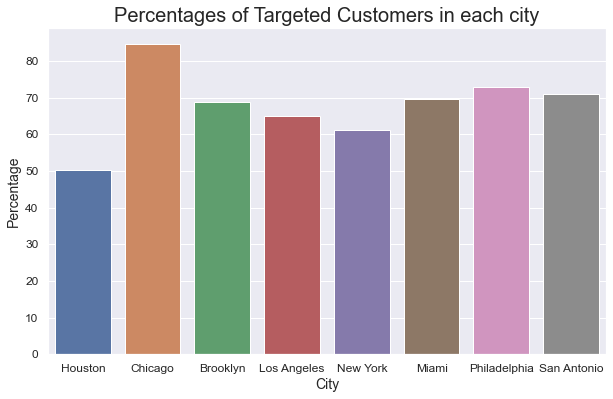

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Percentage", data=demog)
plt.title("Percentages of Targeted Customers in each city", size=20)

plt.show()

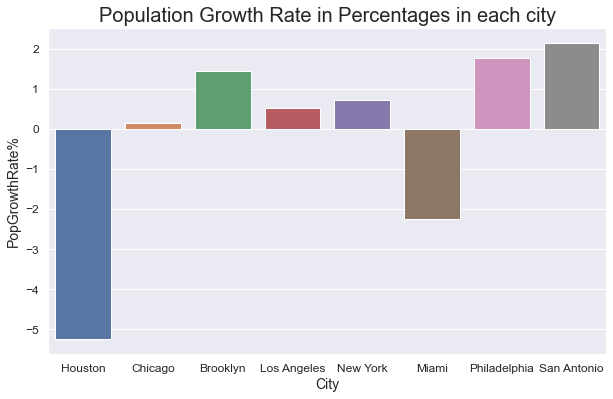

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="PopGrowthRate%", data=demog)
plt.title("Population Growth Rate in Percentages in each city", size=20)

plt.show()

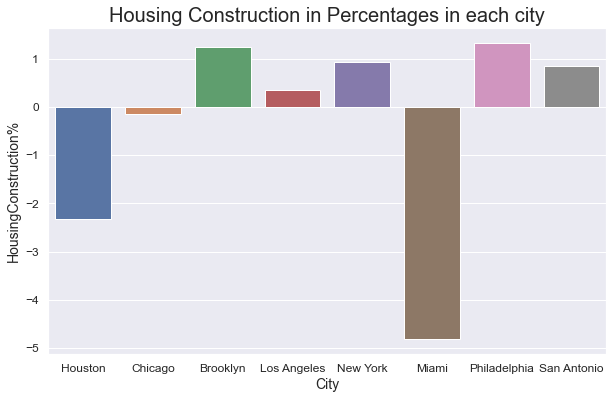

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="HousingConstruction%", data=demog)
plt.title("Housing Construction in Percentages in each city", size=20)

plt.show()

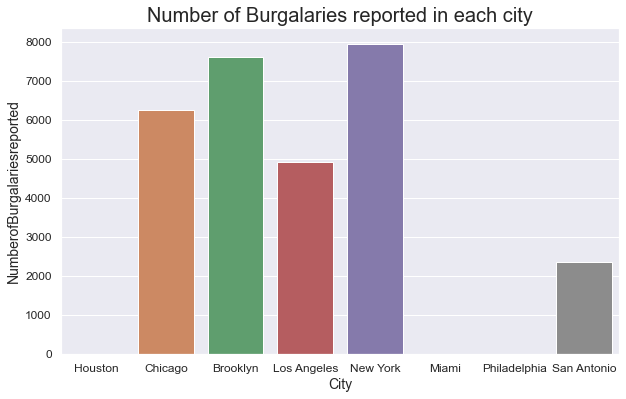

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="NumberofBurgalariesreported", data=demog)
plt.title("Number of Burgalaries reported in each city", size=20)

plt.show()

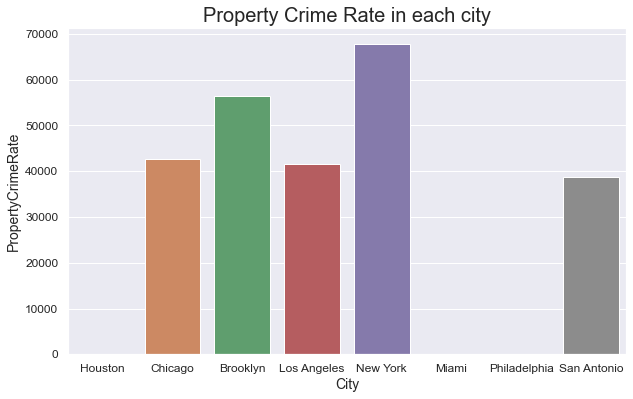

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="PropertyCrimeRate", data=demog)
plt.title("Property Crime Rate in each city", size=20)

plt.show()

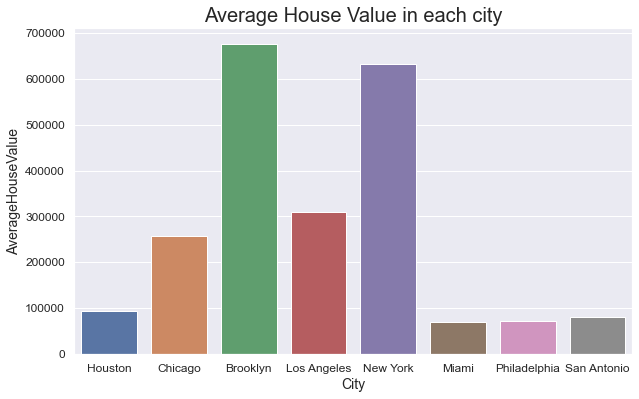

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="AverageHouseValue", data=demog)
plt.title("Average House Value in each city", size=20)

plt.show()

## Conclusion

From the tables, we decided on dense populations in cities since we can reach as many customers in one city.

Selected cities are Houston, Chicago, Brooklyn, Los Angeles, New York

#### Python code done by Dennis Lam